In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
image_compression_names = [
    'JPEG',
    'WEBP',
    'mbt2018',
    'HiFiC'
]

image_markers = ['o', 's', '^', 'D'] 

audio_compression_names = [
    'MP3',
    'Opus',
    'EnCodec',
]

audio_markers = ['p', '*', 'x']

imagenet_acc = [
    0.799,
    0.639,
    0.72 ,
    0.733,
    0.795
]
imagenet_bpp = [
    0.26474601405625764,
    0.14787044451833736,
    0.14990276963116184,
    0.02639249681257391
]
ade_miou = [
    0.3189359286425029,
    0.11916789777300861,
    0.18866411196081573,
    0.20750815154022598,
    0.30084247702965283
]
ade_bpp = [
    0.2616756840709221,
    0.13477392121864096,
    0.13477048131961145,
    0.025415553682810475
]
cv_wer = [
    0.15111052,
    0.19275516,
    0.24643046,
    0.20491803
]
cv_bps = [
    0.6700,
    0.1470,
    0.1262
]
xray_acc = [
    0.96566524,
    0.96738197,
    0.96995708,
    0.94849785,
    0.96566524
]
xray_bpp=[
    0.16469623457618024,
    0.045985783261802575,
    0.03231692596566524,
    0.010857920634388412
]
beans_acc = [
    0.97744361,
    0.76691729,
    0.95488722,
    0.94736842,
    0.98496241
]
beans_bpp = [
    0.24133606015037593,
    0.14150833082706765,
    0.14844727819548872,
    0.028631127819548872
]

musdb_sdr = [
    6.286550521850586,
    3.4406304359436035,
    0.29862770438194275,
    2.968838930130005
]
musdb_bps = [
    0.36287301778793335,
    0.06615560501813889,
    0.06871381402015686
]

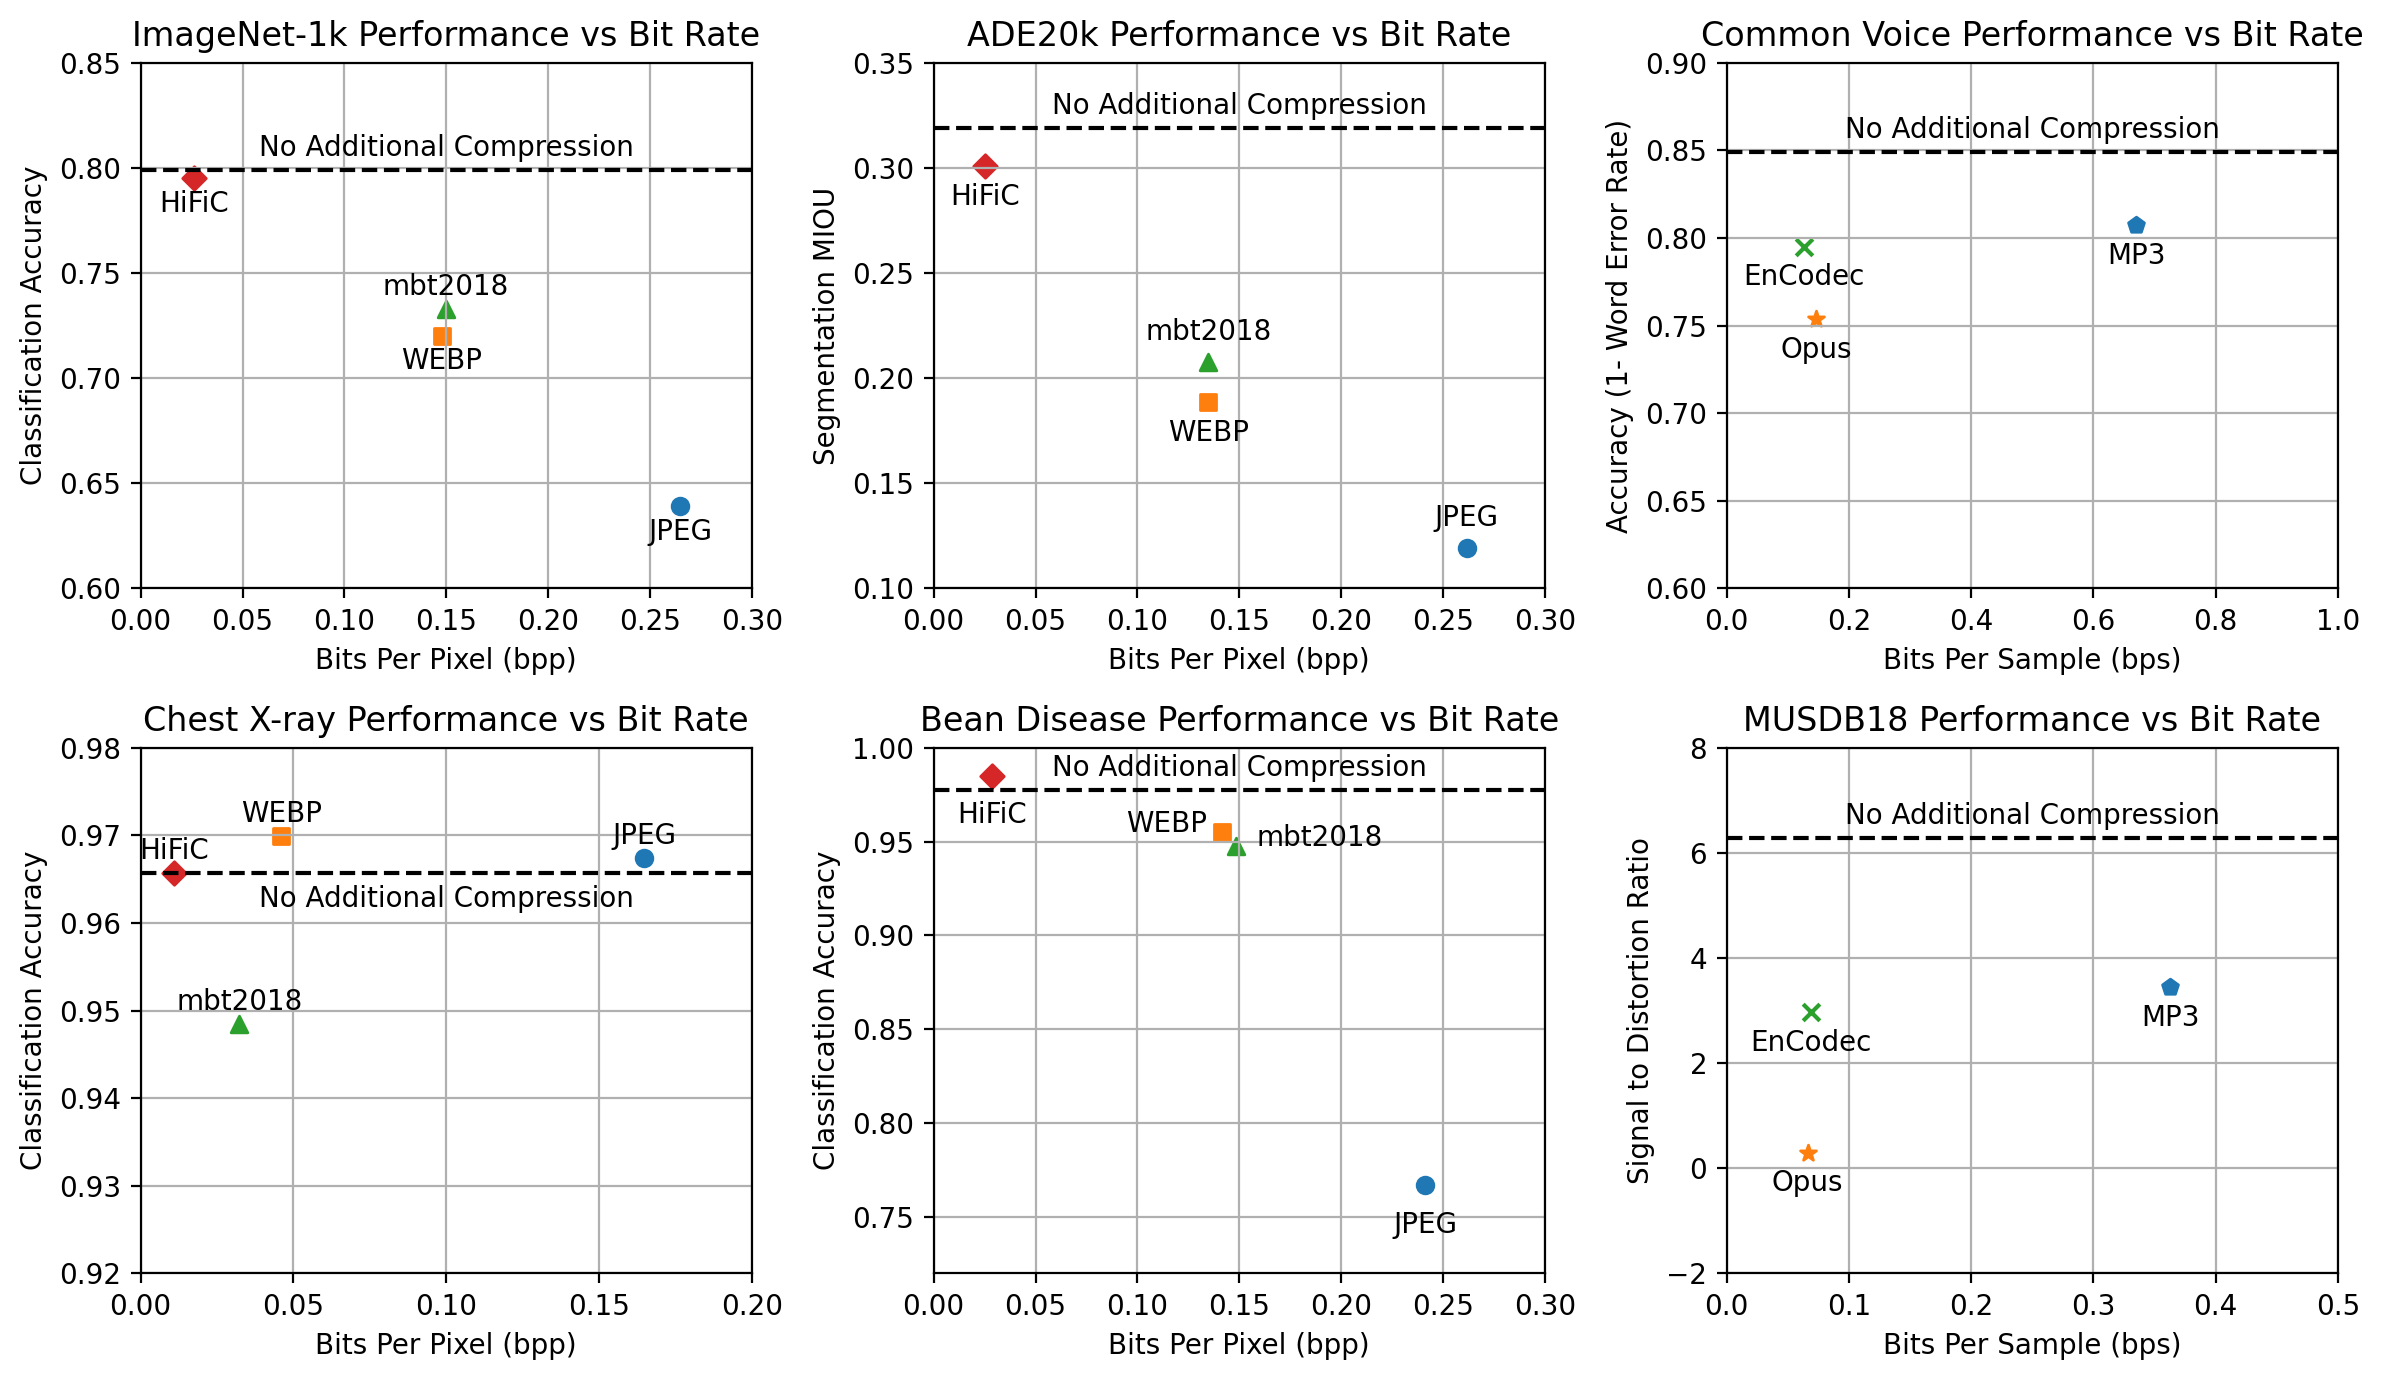

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(12, 7),dpi=200)


# Imagenet

baseline_acc = imagenet_acc[0]
classification_acc = imagenet_acc[1:]
image_bpp = imagenet_bpp

# axs[0,0].scatter(image_bpp, classification_acc, c=[0,1,2,3], marker='x',cmap='tab10')
for xi, yi, mi in zip(image_bpp, classification_acc, image_markers):
    axs[0,0].scatter(xi, yi, marker=mi)
axs[0,0].annotate("No Additional Compression", (0.15, baseline_acc), textcoords="offset points", xytext=(0,5), ha='center')
axs[0,0].plot([0,1],[baseline_acc,baseline_acc],'--',c='black')
for i, name in enumerate(image_compression_names):
    if i == 2:
        offset = (0,5)
    else:
        offset = (0,-12)
    axs[0,0].annotate(name, (image_bpp[i], classification_acc[i]), textcoords="offset points", xytext=offset, ha='center')
axs[0,0].set_xlabel('Bits Per Pixel (bpp)')
axs[0,0].set_ylabel('Classification Accuracy')
axs[0,0].set_title('ImageNet-1k Performance vs Bit Rate')
axs[0,0].set_xlim([0,0.3])
axs[0,0].set_ylim([0.6,0.85])
axs[0,0].grid(True)

# ADE20k

baseline_miou = ade_miou[0]
segmentation_miou = ade_miou[1:]
image_bpp = ade_bpp

# axs[0,1].scatter(image_bpp, segmentation_miou, c=[0,1,2,3], marker='x',cmap='tab10')
for xi, yi, mi in zip(image_bpp, segmentation_miou, image_markers):
    axs[0,1].scatter(xi, yi, marker=mi)
axs[0,1].annotate("No Additional Compression", (0.15, baseline_miou), textcoords="offset points", xytext=(0,5), ha='center')
axs[0,1].plot([0,1],[baseline_miou,baseline_miou],'--',c='black')
for i, name in enumerate(image_compression_names):
    if i == 1:
        offset = (0,-14)
    elif i == 3:
        offset = (0,-14)
    else:
        offset = (0,8)
    axs[0,1].annotate(name, (image_bpp[i], segmentation_miou[i]), textcoords="offset points", xytext=offset, ha='center')
axs[0,1].set_xlabel('Bits Per Pixel (bpp)')
axs[0,1].set_ylabel('Segmentation MIOU')
axs[0,1].set_title('ADE20k Performance vs Bit Rate')
axs[0,1].set_xlim([0,0.3])
axs[0,1].set_ylim([0.1,0.35])
axs[0,1].grid(True)

# Common voice

baseline_wer = cv_wer[0]
asr_wer = np.array(cv_wer[1:])
audio_bps = cv_bps

# axs[0,2].scatter(audio_bps, 1-asr_wer, c=[0,1,2], marker='x',cmap='tab10')
for xi, yi, mi in zip(audio_bps, 1-asr_wer, audio_markers):
    axs[0,2].scatter(xi, yi, marker=mi)
axs[0,2].annotate("No Additional Compression", (0.5, 1-baseline_wer), textcoords="offset points", xytext=(0,5), ha='center')
axs[0,2].plot([0,1],[1-baseline_wer,1-baseline_wer],'--',c='black')
for i, name in enumerate(audio_compression_names):
    axs[0,2].annotate(name, (audio_bps[i], 1-asr_wer[i]), textcoords="offset points", xytext=(0,-14), ha='center')
axs[0,2].set_xlabel('Bits Per Sample (bps)')
axs[0,2].set_ylabel('Accuracy (1- Word Error Rate)')
axs[0,2].set_title('Common Voice Performance vs Bit Rate')
axs[0,2].set_xlim([0,1])
axs[0,2].set_ylim([0.6,0.9])
axs[0,2].grid(True)

# x ray

baseline_acc = xray_acc[0]
classification_acc = xray_acc[1:]
image_bpp = xray_bpp

# axs[1,0].scatter(image_bpp, classification_acc, c=[0,1,2,3], marker='x',cmap='tab10')
for xi, yi, mi in zip(image_bpp, classification_acc, image_markers):
    axs[1,0].scatter(xi, yi, marker=mi)
axs[1,0].annotate("No Additional Compression", (0.1, baseline_acc), textcoords="offset points", xytext=(0,-12), ha='center')
axs[1,0].plot([0,1],[baseline_acc,baseline_acc],'--',c='black')
for i, name in enumerate(image_compression_names):
    axs[1,0].annotate(name, (image_bpp[i], classification_acc[i]), textcoords="offset points", xytext=(0,5), ha='center')
axs[1,0].set_xlabel('Bits Per Pixel (bpp)')
axs[1,0].set_ylabel('Classification Accuracy')
axs[1,0].set_title('Chest X-ray Performance vs Bit Rate')
axs[1,0].set_xlim([0,0.2])
axs[1,0].set_ylim([0.92,0.98])
axs[1,0].grid(True)

# beans

baseline_acc = beans_acc[0]
classification_acc = beans_acc[1:]
image_bpp = beans_bpp

# axs[1,1].scatter(image_bpp, classification_acc,c=[0,1,2,3], marker='x',cmap='tab10')
for xi, yi, mi in zip(image_bpp, classification_acc, image_markers):
    axs[1,1].scatter(xi, yi, marker=mi)
axs[1,1].annotate("No Additional Compression", (0.15, baseline_acc), textcoords="offset points", xytext=(0,5), ha='center')
axs[1,1].plot([0,1],[baseline_acc,baseline_acc],'--',c='black')
for i, name in enumerate(image_compression_names):
    if i==1:
        offset = (-20,0)
    elif i==2:
        offset = (30,0)
    else:
        offset = (0,-17)
    axs[1,1].annotate(name, (image_bpp[i], classification_acc[i]), textcoords="offset points", xytext=offset, ha='center')
axs[1,1].set_xlabel('Bits Per Pixel (bpp)')
axs[1,1].set_ylabel('Classification Accuracy')
axs[1,1].set_title('Bean Disease Performance vs Bit Rate')
axs[1,1].set_xlim([0,0.3])
axs[1,1].set_ylim([0.72,1.0])
axs[1,1].grid(True)

#musdb
baseline_sdr = musdb_sdr[0]
mean_sdr = musdb_sdr[1:]
audio_bps = musdb_bps

# axs[1,2].scatter(audio_bps, mean_sdr, c=[0,1,2], marker='x',cmap='tab10')
for xi, yi, mi in zip(audio_bps, mean_sdr, audio_markers):
    axs[1,2].scatter(xi, yi, marker=mi)
axs[1,2].annotate("No Additional Compression", (0.25, baseline_sdr), textcoords="offset points", xytext=(0,5), ha='center')
axs[1,2].plot([0,1],[baseline_sdr,baseline_sdr],'--',c='black')
for i, name in enumerate(audio_compression_names):
    plt.annotate(name, (audio_bps[i], mean_sdr[i]), textcoords="offset points", xytext=(0,-14), ha='center')
axs[1,2].set_xlabel('Bits Per Sample (bps)')
axs[1,2].set_ylabel('Signal to Distortion Ratio')
axs[1,2].set_title('MUSDB18 Performance vs Bit Rate')
axs[1,2].set_xlim([0,0.5])
axs[1,2].set_ylim([-2,8])
axs[1,2].grid(True)

plt.tight_layout()
# plt.subplots_adjust(hspace=0.3)